In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
from sklearn import preprocessing
import shapefile as shp
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch
import matplotlib.patches as mpatches

from sklearn import preprocessing

import shapefile as shp
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch
%matplotlib inline
%matplotlib inline

## Question 1.  (40 pts)

This is an artificial data set. It has five features and let's explore clustering models on this data set.

In [2]:
data1=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/data1.csv")
print(data1.shape)
data1.head()

(100, 5)


,0,1,2,3,4
0,7.041668,0.679020,-8.408575,3.461746,-5.597806
1,-4.816582,-0.430385,0.753123,0.264526,3.965808
2,4.096806,-6.559957,-4.302680,-5.615232,5.635794
3,4.962203,-6.756521,-5.252219,-6.075322,2.754351
4,7.039362,0.263419,-7.505487,1.981984,-10.156349


#### 1. Visualize the data1 using PCA on a two dimensional plane and guess the number of clusters we could have from the plot. (5 pts)

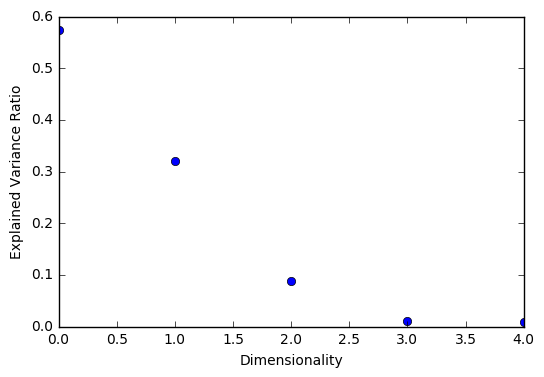

In [3]:
n=5 # how many eigenvectors we choose
from sklearn.decomposition import PCA
pca = PCA(n)
Xproj = pca.fit_transform(data1)
eigenvalues = pca.explained_variance_ratio_
plt.plot(np.arange(n), eigenvalues, 'o')
plt.xlabel("Dimensionality")
plt.ylabel("Explained Variance Ratio")
plt.show()

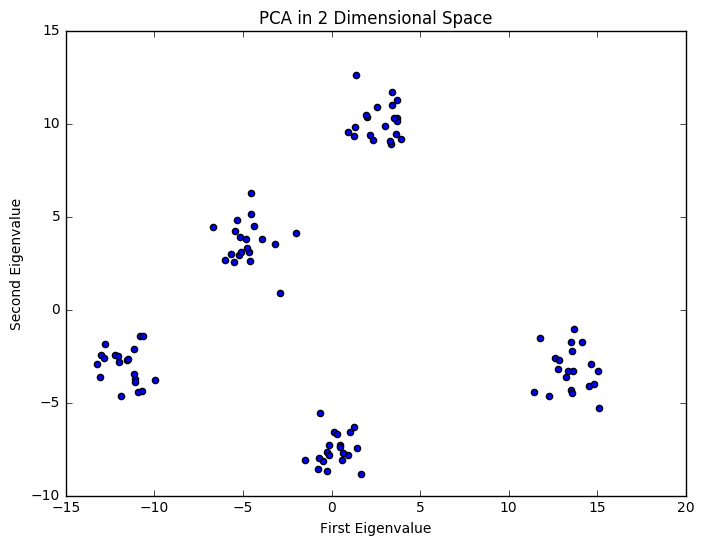

In [4]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj[:, 0], Xproj[:, 1], c='b', cmap=plt.cm.cool)
plt.xlabel('First Eigenvalue')
plt.ylabel('Second Eigenvalue')
plt.title("PCA in 2 Dimensional Space")
plt.show()

#### As it is visible From the graph above, we can have 5 clusters.

#### 2. Use silhouette_score and elbow method to justify the optimal number k of clusters for K-means clustering. Report the k and give a short explanation. (15 pts)

In [5]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import numpy as np

X=data1
range_n_clusters = [2, 3, 4, 5,6]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.4360092516911356
For n_clusters =3, the average silhouette_score is :0.5440625206528601
For n_clusters =4, the average silhouette_score is :0.6476345544454116
For n_clusters =5, the average silhouette_score is :0.7558438490655959
For n_clusters =6, the average silhouette_score is :0.6656846098884995


#### From the result of silhouette_score, we should choose k=5( more it is closer to one, more liekly it is that the points are closer to their cluster centroids than to all the other ones 
Let's visualise the plot for each observation for each cluster

In [6]:
def silhouette_score_plot(data,range_n_clusters):
    X=data
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(10, 5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

For n_clusters = 2 The average silhouette_score is : 0.436009251691


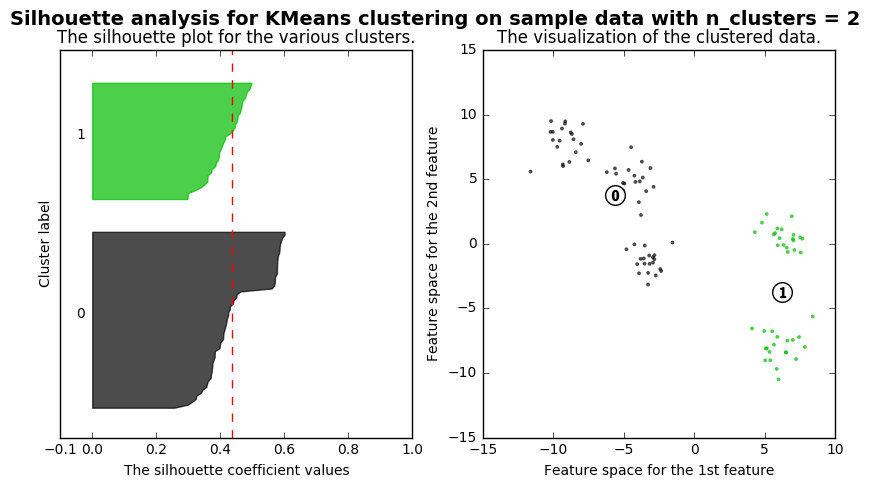

For n_clusters = 3 The average silhouette_score is : 0.544062520653


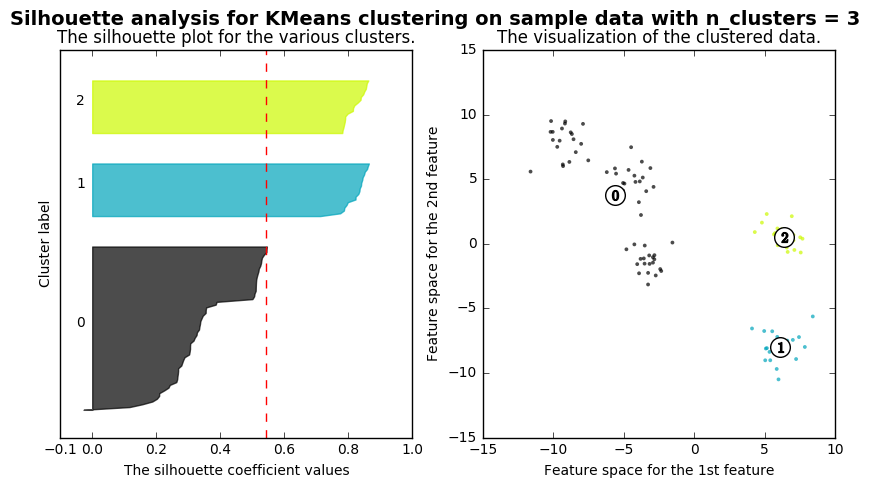

For n_clusters = 4 The average silhouette_score is : 0.647634554445


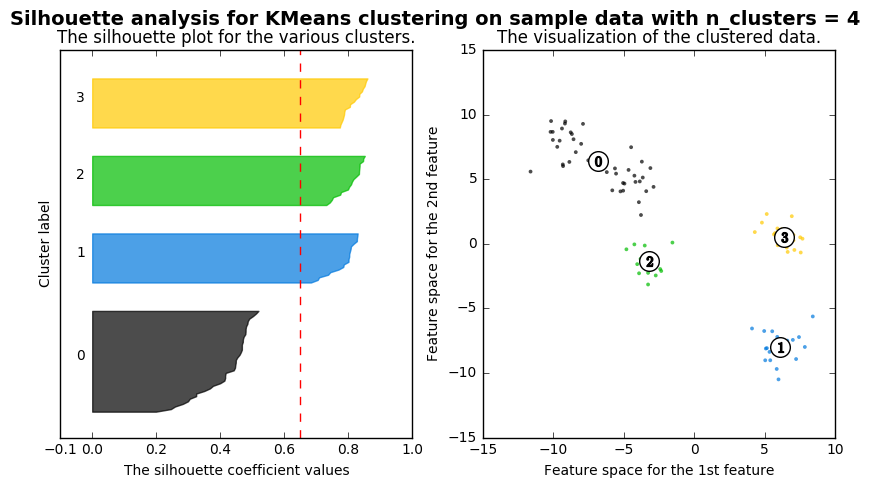

For n_clusters = 5 The average silhouette_score is : 0.755843849066


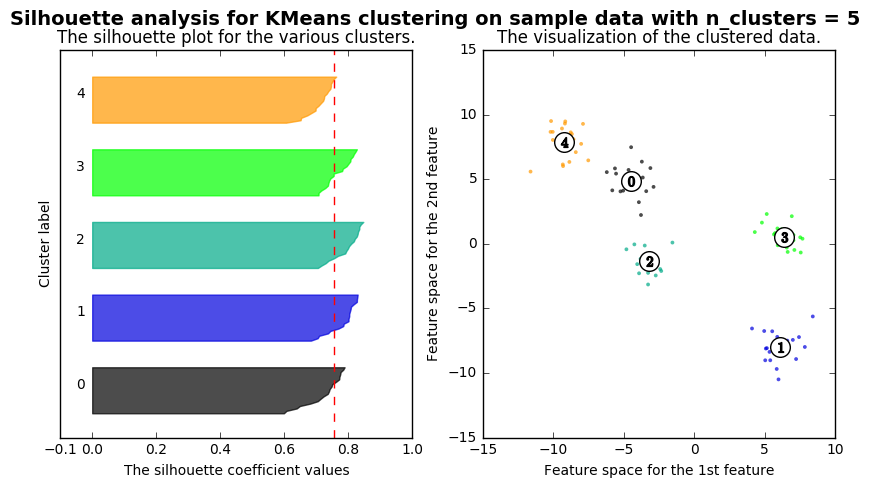

In [7]:
silhouette_score_plot(np.array(data1),range(2,6))

### Elbow Method

In [8]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

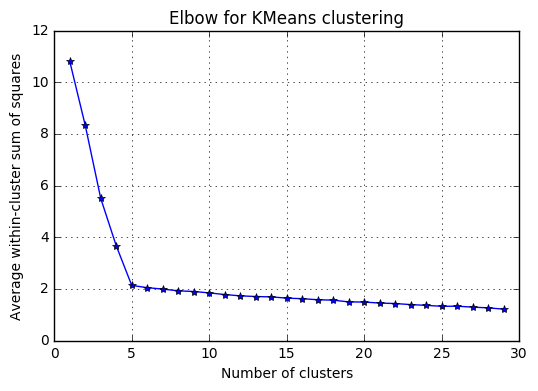

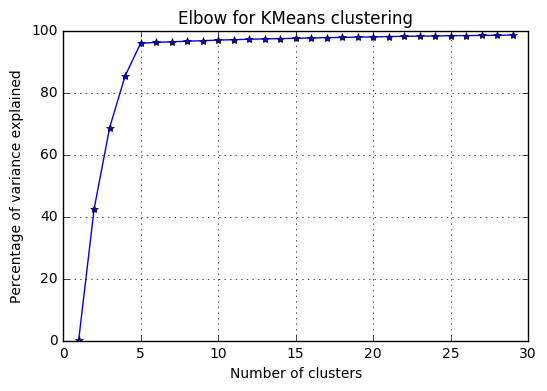

In [9]:
elbow(data1, range(1,30))

#### After K=5, the SSE decreases abruptly, hence Elbow method suggests that the number of clusters should be 5. 

#### 3. Use K-means to cluster the data1 by the proper number of clusters k you found and report your result. (5 pts) 

In [10]:
#Use package from sklearn.
from sklearn.cluster import KMeans
n=5
dd = data1
#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)
#result.
res.labels_ = res.labels_.tolist()
for i in range(5):
    print("the number of data points in cluster " + str(i+1) + ':'+ str(res.labels_.count(i)))

the number of data points in cluster 1:20
the number of data points in cluster 2:20
the number of data points in cluster 3:20
the number of data points in cluster 4:20
the number of data points in cluster 5:20


The data points in data1 are clustered equally i.e each cluster has 20 datapoints.

#### 4.  Visualize the clustering result. Please use the plot from part 1 and color the points by the new labels (the clustering results). (5 pts)

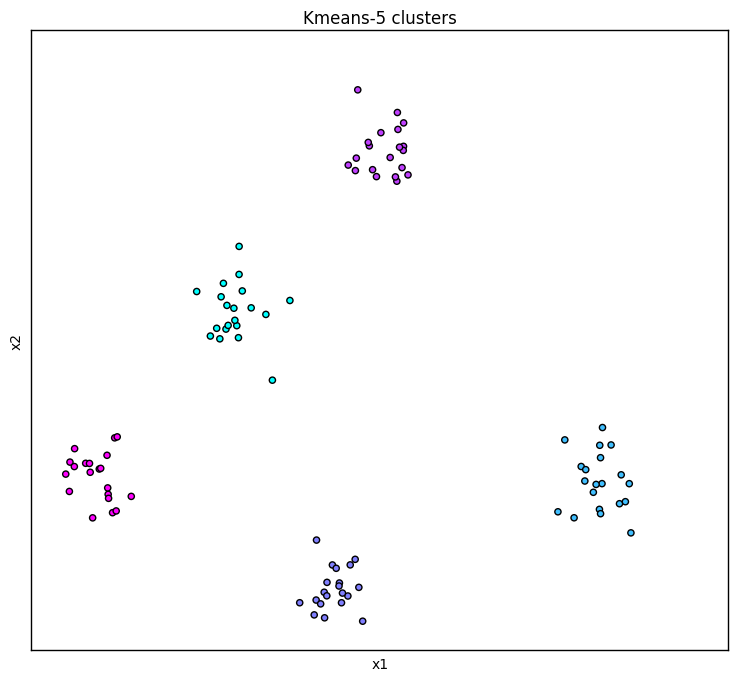

In [11]:
plt.figure(figsize=(9, 8))
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=res.labels_ , cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(n))
plt.show()

#### 5. Use Guassian Mixture model instead of K-means with the same k and repeat the part 3 and 4. (10 pts)

In [12]:
import sklearn
sklearn.__version__

'0.18'

In [13]:
n=4
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.
gm=GaussianMixture(n_components=n,random_state=324)
res1=gm.fit(data1)

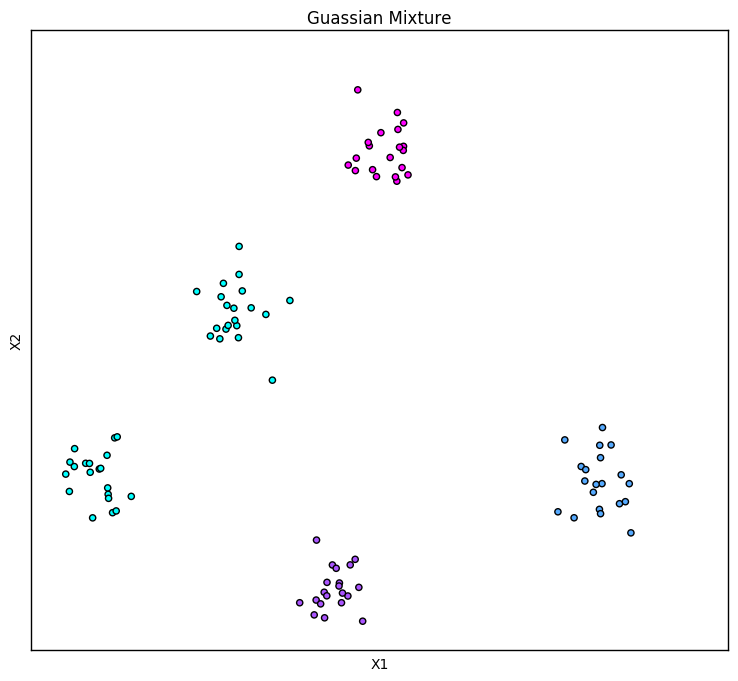

In [14]:
#Plot.
plt.figure(figsize=(9, 8))
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=res1.predict(data1), cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Guassian Mixture")

## Question 2 : (30 pts)

This homework assignment concerns NYPD police stops in New York City in the years 
2011-2012 where the suspected crime was CPW (criminal possession of a weapon).  You can 
read more about these stops at 

https://en.wikipedia.org/wiki/Terry_stop 

https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City 

You are given 1,069 stop records in the file ‘original_with_duplicates_noid.csv’, but 
unfortunately technical errors have resulted in some exact duplicate records.  You know 
there are around 1,000 unique stops in the file (there may be slightly more or slightly 
fewer).   


In [15]:
data2=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/original_with_duplicates_noid.csv")
print(data2.shape)
print(data2.columns)
data2.head()

(1069, 39)
Index(['year', 'found.weapon', 'found.gun', 'arrested', 'suspect.race',
       'suspect.age', 'suspect.build', 'suspect.sex', 'suspect.height',
       'suspect.weight', 'stopped.bc.desc', 'stopped.bc.violent',
       'stopped.bc.other', 'stopped.bc.object', 'stopped.bc.casing',
       'stopped.bc.lookout', 'stopped.bc.drugs', 'stopped.bc.clothing',
       'stopped.bc.furtive', 'stopped.bc.bulge', 'precinct', 'inside.outside',
       'location.housing', 'observation.period', 'officer.uniform',
       'additional.report', 'additional.investigation', 'additional.proximity',
       'additional.evasive', 'additional.associating', 'additional.direction',
       'additional.highcrime', 'additional.time', 'additional.sights',
       'additional.other', 'radio.run', 'day', 'month', 'time.period'],
      dtype='object')


,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2012,False,False,False,black,27,medium,male,5.666667,180,...,False,False,False,False,False,False,False,Saturday,January,6
1,2011,False,False,False,asian,40,medium,male,6.166667,225,...,False,False,True,True,False,False,False,Friday,November,6
2,2012,False,False,False,black,20,medium,male,6.000000,200,...,False,False,False,False,False,False,False,Saturday,August,6
3,2011,False,False,False,black,23,medium,male,5.916667,180,...,False,False,False,True,False,False,False,Friday,April,1
4,2011,False,False,False,black,33,thin,male,5.666667,175,...,False,False,False,False,False,False,False,Thursday,December,4



#### 1. Use a clustering technique of your choice to determine how many unique records there are. (15 pts)

#### 2. Check your work by looking for row-wise duplicates using any technique of your choice (this should be straightforward).  How well did your clustering technique perform?  (5 pts)

#### 3. Write a paragraph explaining what you did in parts a) and b)  (10 pts)

### Part1)

In [16]:
for column in data2:    # Converting object values(Categorical data) into numeric values
    if (data2[column].dtypes) == 'object':
        le_column = preprocessing.LabelEncoder()
        data2[column] = le_column.fit_transform(data2[column])  #convert into numbers
print(data2.shape)
data2.head()

(1069, 39)


,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2012,False,False,False,1,27,1,1,5.666667,180,...,False,False,False,False,False,False,False,2,4,6
1,2011,False,False,False,0,40,1,1,6.166667,225,...,False,False,True,True,False,False,False,0,9,6
2,2012,False,False,False,1,20,1,1,6.000000,200,...,False,False,False,False,False,False,False,2,1,6
3,2011,False,False,False,1,23,1,1,5.916667,180,...,False,False,False,True,False,False,False,0,0,1
4,2011,False,False,False,1,33,3,1,5.666667,175,...,False,False,False,False,False,False,False,4,2,4


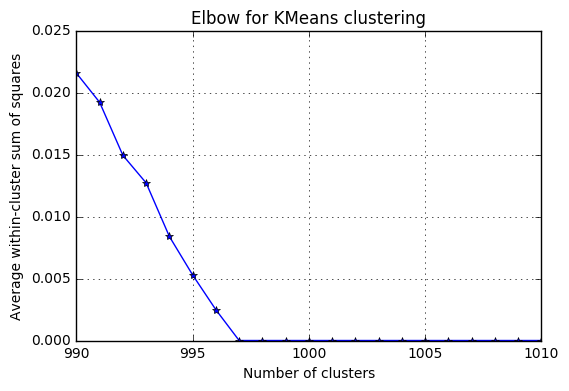

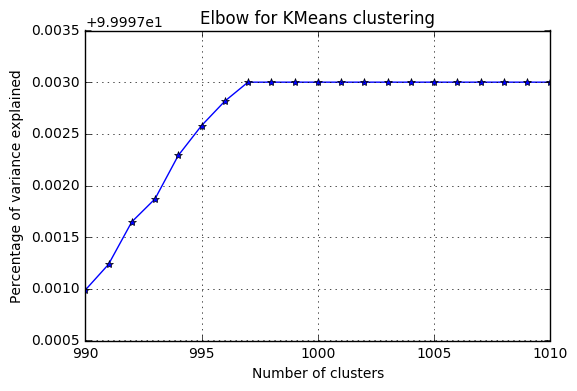

In [17]:
elbow(data2,range(990,1011))

### From the above graph we can see, The Unique Records are 997.

### Part2)

In [18]:
data2.drop_duplicates().shape    #dropping duplicate rows.

(997, 39)

### Hence by dropping duplicated rows from data2, we get the dataframe with 997 rows i.e 997 unique Records. Therefore Our Clustering Technique gave us the right Result i.e 997

## Part3

In Part1, I used Elbow method to plot the average within-cluster SSE against the number of clusters and also plotted the Percentage of Variance explained against number of clusters. The Elbow method looks at the percentage of variance explained as a function of the number of clusters. if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. But If the marginal gain becomes constant if the number of clusters is equal to the datapoints. Hence from @nd graph we can see that after 997 clusters, there is no drop in marginal gain, hence there are no more clusters and therefore there are no more datapoints.

 Also when we plot k(no.of clusters) against the SSE, we see that the error decreases as k gets larger; and after 997 it becomes zero and doesn't decrease anymore. Therefore at value 997, the number of clusters becomes equal to number of datapoints. So setting k(no.of clusters) = no. of datapoints, the average within-cluster SSE gets zero. So, we used a range of 990 to 1011 to see at what number of clusters, the SSE becomes zero. and found 997.
 
In Part 2 I used drop_duplicates method to drop all the duplicate rows by considering all of the columns, then looked for shape of dataframe to know the number of rows after dropping duplicate rows. I found drop_duplicates here:  
(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html) 

### Question 3: 311 data (30 pts)

The 311 data is not new for us. Let us use the scaled 311 data for question 3.

Be careful! The first three columns are : zip code(zip_code), the average income(mean), and the average housing price(sale_price) 

In [19]:
#using data provided by TA
data3=pd.read_csv("http://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/HW4_Q3.csv").iloc[:,1:]
data3=pd.concat((data3.loc[:,["zip","mean","sale_price"]],data3.loc[:,"Adopt A Basket":]),axis=1)
data3.head(3)

,zip,mean,sale_price,Adopt A Basket,Air Quality,Animal Abuse,Animal Facility No Permit,Animal in a Park,Asbestos,BEST Site Safety,...,VACANT APARTMENT,Vacant Lot,Vending,Violation of Park Rules,WATER LEAK,Water Conservation,Water Quality,Water System,Window Guard,X Ray Machine Equipment
0,10001,123112.0,1950000.0,0.000000,0.001253,0.004762,0.000000,0.000251,0.004637,0.000376,...,0.0,0.000125,0.005263,0.001003,0.004511,0.001378,0.000000,0.046115,0.0,0.0
1,10002,NaN,NaN,0.000081,0.000486,0.003730,0.000000,0.000811,0.001622,0.000405,...,0.0,0.000324,0.003892,0.004784,0.006649,0.000730,0.000243,0.030649,0.0,0.0
2,10003,139330.0,4981025.0,0.000000,0.000740,0.004935,0.000247,0.000576,0.002303,0.000329,...,0.0,0.000000,0.003948,0.003043,0.010527,0.000658,0.000576,0.029114,0.0,0.0


#### 1. Use Kmeans clustering model to cluster NYC zip codes into FOUR clusters. The feature space is the scaled 311 complaints data (from "Adopt A Basket" to the end. Please do not include "mean" and "sale_price" ) as provided.  Report the number of zip codes in each clusters. (10 pts)

#### 2. Calculate the average income and average housing price for each cluster you get from part 1. (10 pts)

#### 3. Visulize the clustering result on the map (For this part you need to use the shapefiles of NY).  (10 pts)

### Part1)

In [20]:
n=4
X=data3.iloc[:,3:]
km = KMeans(n_clusters= n, random_state=177)
cluster_labels = km.fit_predict(X)
print(cluster_labels)
res_KM=pd.concat((data3.loc[:,'zip'],pd.DataFrame(cluster_labels)),axis=1)
res_KM.head()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 2 0 0 3 3 0 0 0 2
 0 3 0 2 0 3 3 1 2 2 2 0 2 2 1 0 2 2 2 2 2 2 2 2 0 0 2 2 0 2 2 2 2 0 2 2 2
 0 0 3 2 2 3 2 0 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 1 2 2 2 2 2 2 2 2 2 3
 3 2 3 2 3 3 2 2 3 2 2 2 2 3 3 3 3 3 3 2 2 2 2 2 2 2 3 3 3 3]


,zip,0
0,10001,1
1,10002,1
2,10003,1
3,10004,1
4,10005,1


In [21]:
res_KM.columns = ['zip', 'cluster']
res_KM.head(3)

,zip,cluster
0,10001,1
1,10002,1
2,10003,1


In [22]:
cluster_labels =cluster_labels.tolist()
for i in range(4):
    print("the number of Zip Codes in cluster " + str(i+1) + ': '+ str(cluster_labels.count(i)))

the number of Zip Codes in cluster 1: 41
the number of Zip Codes in cluster 2: 32
the number of Zip Codes in cluster 3: 60
the number of Zip Codes in cluster 4: 45


### Part2)

In [23]:
data4 = pd.concat((res_KM.loc[:,:], data3.loc[:,['mean','sale_price']]),axis=1)
data4.head()

,zip,cluster,mean,sale_price
0,10001,1,123112.0,1950000.0
1,10002,1,NaN,NaN
2,10003,1,139330.0,4981025.0
3,10004,1,NaN,NaN
4,10005,1,NaN,NaN


In [24]:
data4.dropna(inplace = True)

In [25]:
data4.head(5)


,zip,cluster,mean,sale_price
0,10001,1,123112.0,1.950000e+06
2,10003,1,139330.0,4.981025e+06
9,10011,1,160936.0,1.150000e+07
12,10014,1,162205.0,1.160757e+07
14,10017,1,149723.0,5.200000e+06


In [26]:
for i in range(4):
    print("The Average income of cluster " + str(i+1) + ': ' +str(data4[data4.cluster == i]['mean'].sum() / len(data4[data4.cluster == i])))
    print("The Average Sale Price of cluster :" + str(i+1) + ': '+ str(data4[data4.cluster == i]['sale_price'].sum() / len(data4[data4.cluster == i]))+'\n')

The Average income of cluster 1: 48534.08
The Average Sale Price of cluster :1: 598798.7644484

The Average income of cluster 2: 164405.46666666667
The Average Sale Price of cluster :2: 8276141.998288134

The Average income of cluster 3: 62266.22222222222
The Average Sale Price of cluster :3: 581411.8437615925

The Average income of cluster 4: 79796.19047619047
The Average Sale Price of cluster :4: 523677.0371006903



In [27]:
#import shapefile
import shapefile as shp
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch

zipsf = shp.Reader('NY.shp')
zipsf_records=zipsf.records()
zipsf_shape=zipsf.shapeRecords()

def plot_on_map(result):
    
    x = {}
    for i in range(len(result)):
        key=result.loc[i,'zip']
        x[key]=result.loc[i,'cluster']

    #x is a dictionary (zip codes vs values)
    cmap = plt.cm.spectral(np.linspace(0,1,max(x.values())+1))

    fig = plt.figure(figsize = (12,15)) 
    ax = fig.gca() 
    for s in range(0,len(zipsf_records)):
        z=int(zipsf_records[s][0])
        if z in x.keys(): 
            #from here
            k = x[z] 
            c=cmap[k][0:3]    
            shape=zipsf_shape[s]
            x_ = [i[0] for i in shape.shape.points[:]]
            y_ = [i[1] for i in shape.shape.points[:]]
            poly=Polygon(zip(x_,y_))
            #plt.fill(x,y,color=my_cmap[s])
            ax.add_patch(PolygonPatch(poly, fc=c, ec='k', alpha=0.5, zorder=2 ))

    ax.axis('scaled')
    plt.title("clustering result on map")

    clum_num=len(result.loc[:,'cluster'].unique())

    handles=[]
    for t in range(clum_num):
        locals()["patch_{}".format(t)] = mpatches.Patch(color=cmap[t][0:3] , label='cluster'+str(t+1))
        handles.append(locals()["patch_{}".format(t)])

    plt.legend(handles=handles,loc='upper left')
    plt.show()

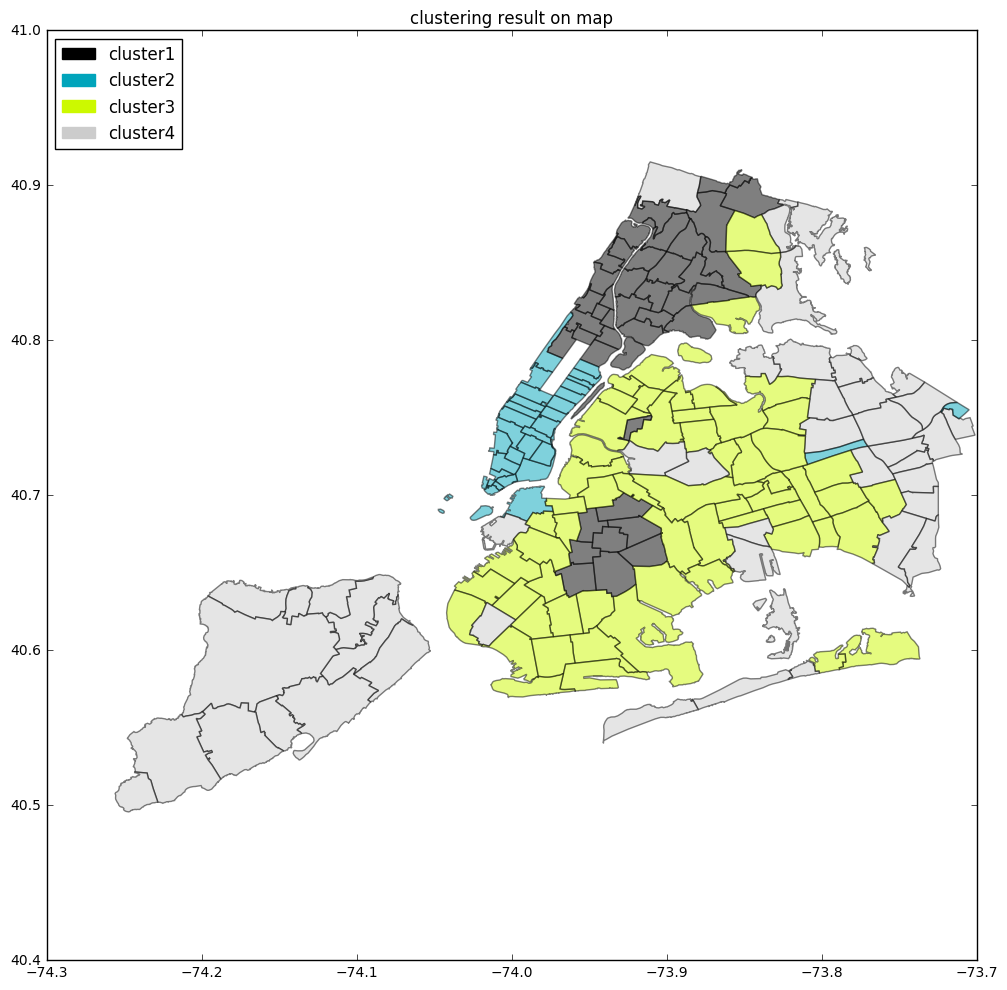

In [28]:
plot_on_map(res_KM)

#### Bonus question. (30 pts)
Continue from Question 2:

You are given 1,100 stop records in the file ‘original_with_errors_noid.csv’, but 
unfortunately technical errors have resulted in some almost duplicate records (that is, 
there are some records that are duplicates of others except for slight variations in two 
features).  You know there are around 1,000 unique stops in the file (there may be 
slightly more or slightly fewer). 



In [29]:
dataBonus=pd.read_csv("https://serv.cusp.nyu.edu/~lw1474/ADS_Data/session07/original_with_errors_noid.csv")
dataBonus.head(3)

,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2011,False,False,False,black,20,heavy,male,5.500000,200,...,False,False,True,False,False,False,False,Wednesday,November,4
1,2012,False,False,False,black,24,medium,male,5.666667,155,...,False,False,True,False,False,False,False,Monday,August,6
2,2011,False,False,False,black,47,heavy,male,6.000000,245,...,False,True,True,True,False,False,False,Saturday,January,4


#### 1. Which are the two features where errors were introduced? (15 pts) 

#### 2. How many unique records there are? (10 pts)

#### 3. Write a paragraph explaining what you did. (5 pts)

### Part1

In [30]:
for column in dataBonus:    # Converting object values(Categorical data) into numeric values
    if (dataBonus[column].dtypes) == 'object':
        le_column = preprocessing.LabelEncoder()
        dataBonus[column] = le_column.fit_transform(dataBonus[column])  #convert into numbers
print(dataBonus.shape)
dataBonus.head()

(1100, 39)


,year,found.weapon,found.gun,arrested,suspect.race,suspect.age,suspect.build,suspect.sex,suspect.height,suspect.weight,...,additional.associating,additional.direction,additional.highcrime,additional.time,additional.sights,additional.other,radio.run,day,month,time.period
0,2011,False,False,False,1,20,0,1,5.500000,200,...,False,False,True,False,False,False,False,6,9,4
1,2012,False,False,False,1,24,1,1,5.666667,155,...,False,False,True,False,False,False,False,1,1,6
2,2011,False,False,False,1,47,0,1,6.000000,245,...,False,True,True,True,False,False,False,2,4,4
3,2012,False,False,False,3,14,3,1,5.500000,140,...,False,True,True,False,False,False,False,5,10,4
4,2012,False,False,False,2,21,1,1,5.750000,145,...,True,True,True,True,False,False,False,5,6,5


In [31]:
dataBonus.columns

Index(['year', 'found.weapon', 'found.gun', 'arrested', 'suspect.race',
       'suspect.age', 'suspect.build', 'suspect.sex', 'suspect.height',
       'suspect.weight', 'stopped.bc.desc', 'stopped.bc.violent',
       'stopped.bc.other', 'stopped.bc.object', 'stopped.bc.casing',
       'stopped.bc.lookout', 'stopped.bc.drugs', 'stopped.bc.clothing',
       'stopped.bc.furtive', 'stopped.bc.bulge', 'precinct', 'inside.outside',
       'location.housing', 'observation.period', 'officer.uniform',
       'additional.report', 'additional.investigation', 'additional.proximity',
       'additional.evasive', 'additional.associating', 'additional.direction',
       'additional.highcrime', 'additional.time', 'additional.sights',
       'additional.other', 'radio.run', 'day', 'month', 'time.period'],
      dtype='object')

In [32]:
for i in dataBonus:
    dup = dataBonus.drop([i], axis=1)
    print(i, dup.duplicated().sum())

year 2
found.weapon 2
found.gun 2
arrested 2
suspect.race 2
suspect.age 19
suspect.build 2
suspect.sex 2
suspect.height 2
suspect.weight 11
stopped.bc.desc 2
stopped.bc.violent 2
stopped.bc.other 2
stopped.bc.object 2
stopped.bc.casing 2
stopped.bc.lookout 2
stopped.bc.drugs 2
stopped.bc.clothing 2
stopped.bc.furtive 2
stopped.bc.bulge 2
precinct 2
inside.outside 2
location.housing 2
observation.period 2
officer.uniform 2
additional.report 2
additional.investigation 2
additional.proximity 2
additional.evasive 2
additional.associating 2
additional.direction 2
additional.highcrime 2
additional.time 2
additional.sights 2
additional.other 2
radio.run 2
day 2
month 2
time.period 2


### From the above calculation, we can see how many duplicate values are there in column 'suspect.age' and 'suspect.weight', so theses are 2 features where a little variation is there in rows.

We can see it here as well:

In [33]:
for i in dataBonus.columns:
    print(i, dataBonus.duplicated(subset = [i]).sum())

year 1098
found.weapon 1098
found.gun 1098
arrested 1098
suspect.race 1094
suspect.age 1045
suspect.build 1095
suspect.sex 1098
suspect.height 1078
suspect.weight 1040
stopped.bc.desc 1098
stopped.bc.violent 1098
stopped.bc.other 1098
stopped.bc.object 1098
stopped.bc.casing 1098
stopped.bc.lookout 1098
stopped.bc.drugs 1098
stopped.bc.clothing 1098
stopped.bc.furtive 1098
stopped.bc.bulge 1098
precinct 1031
inside.outside 1098
location.housing 1097
observation.period 1088
officer.uniform 1098
additional.report 1098
additional.investigation 1098
additional.proximity 1098
additional.evasive 1098
additional.associating 1098
additional.direction 1098
additional.highcrime 1098
additional.time 1098
additional.sights 1098
additional.other 1098
radio.run 1098
day 1093
month 1088
time.period 1094


### Part2)

In [34]:
dataBonus.drop(['suspect.age', 'suspect.weight'], axis=1, inplace = True) # dropping those columns which ahs duplicate records

In [35]:
dataBonus.shape

(1100, 37)

In [36]:
dataBonus.drop_duplicates(inplace= True)

In [37]:
dataBonus.shape

(997, 37)

### Therefore, the total Unique Records are 997 after dropping the duplicated rows.

## Part3)

In part1 I calculted the two features by using df.duplicated.sum(), which gave me values with columns which had extra rows.

In Part2, I dropped those columns and then caluclated number of duplicate rows by using drop_duplicates which gave me number of unique records.